In [ ]:
#2.Apply preprocessing steps to avoid NaN I

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Check for NaN values
print(df.isnull().sum())

# Impute missing values
# For numerical columns, use mean or median imputation
# For categorical columns, use the most frequent value imputation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Check if NaN values are handled
print(df.isnull().sum())


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
A

In [ ]:
#3.Apply exploratory data analysis such as pairplot, scatterplot, barcharts and line graphs, violin plots etc

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


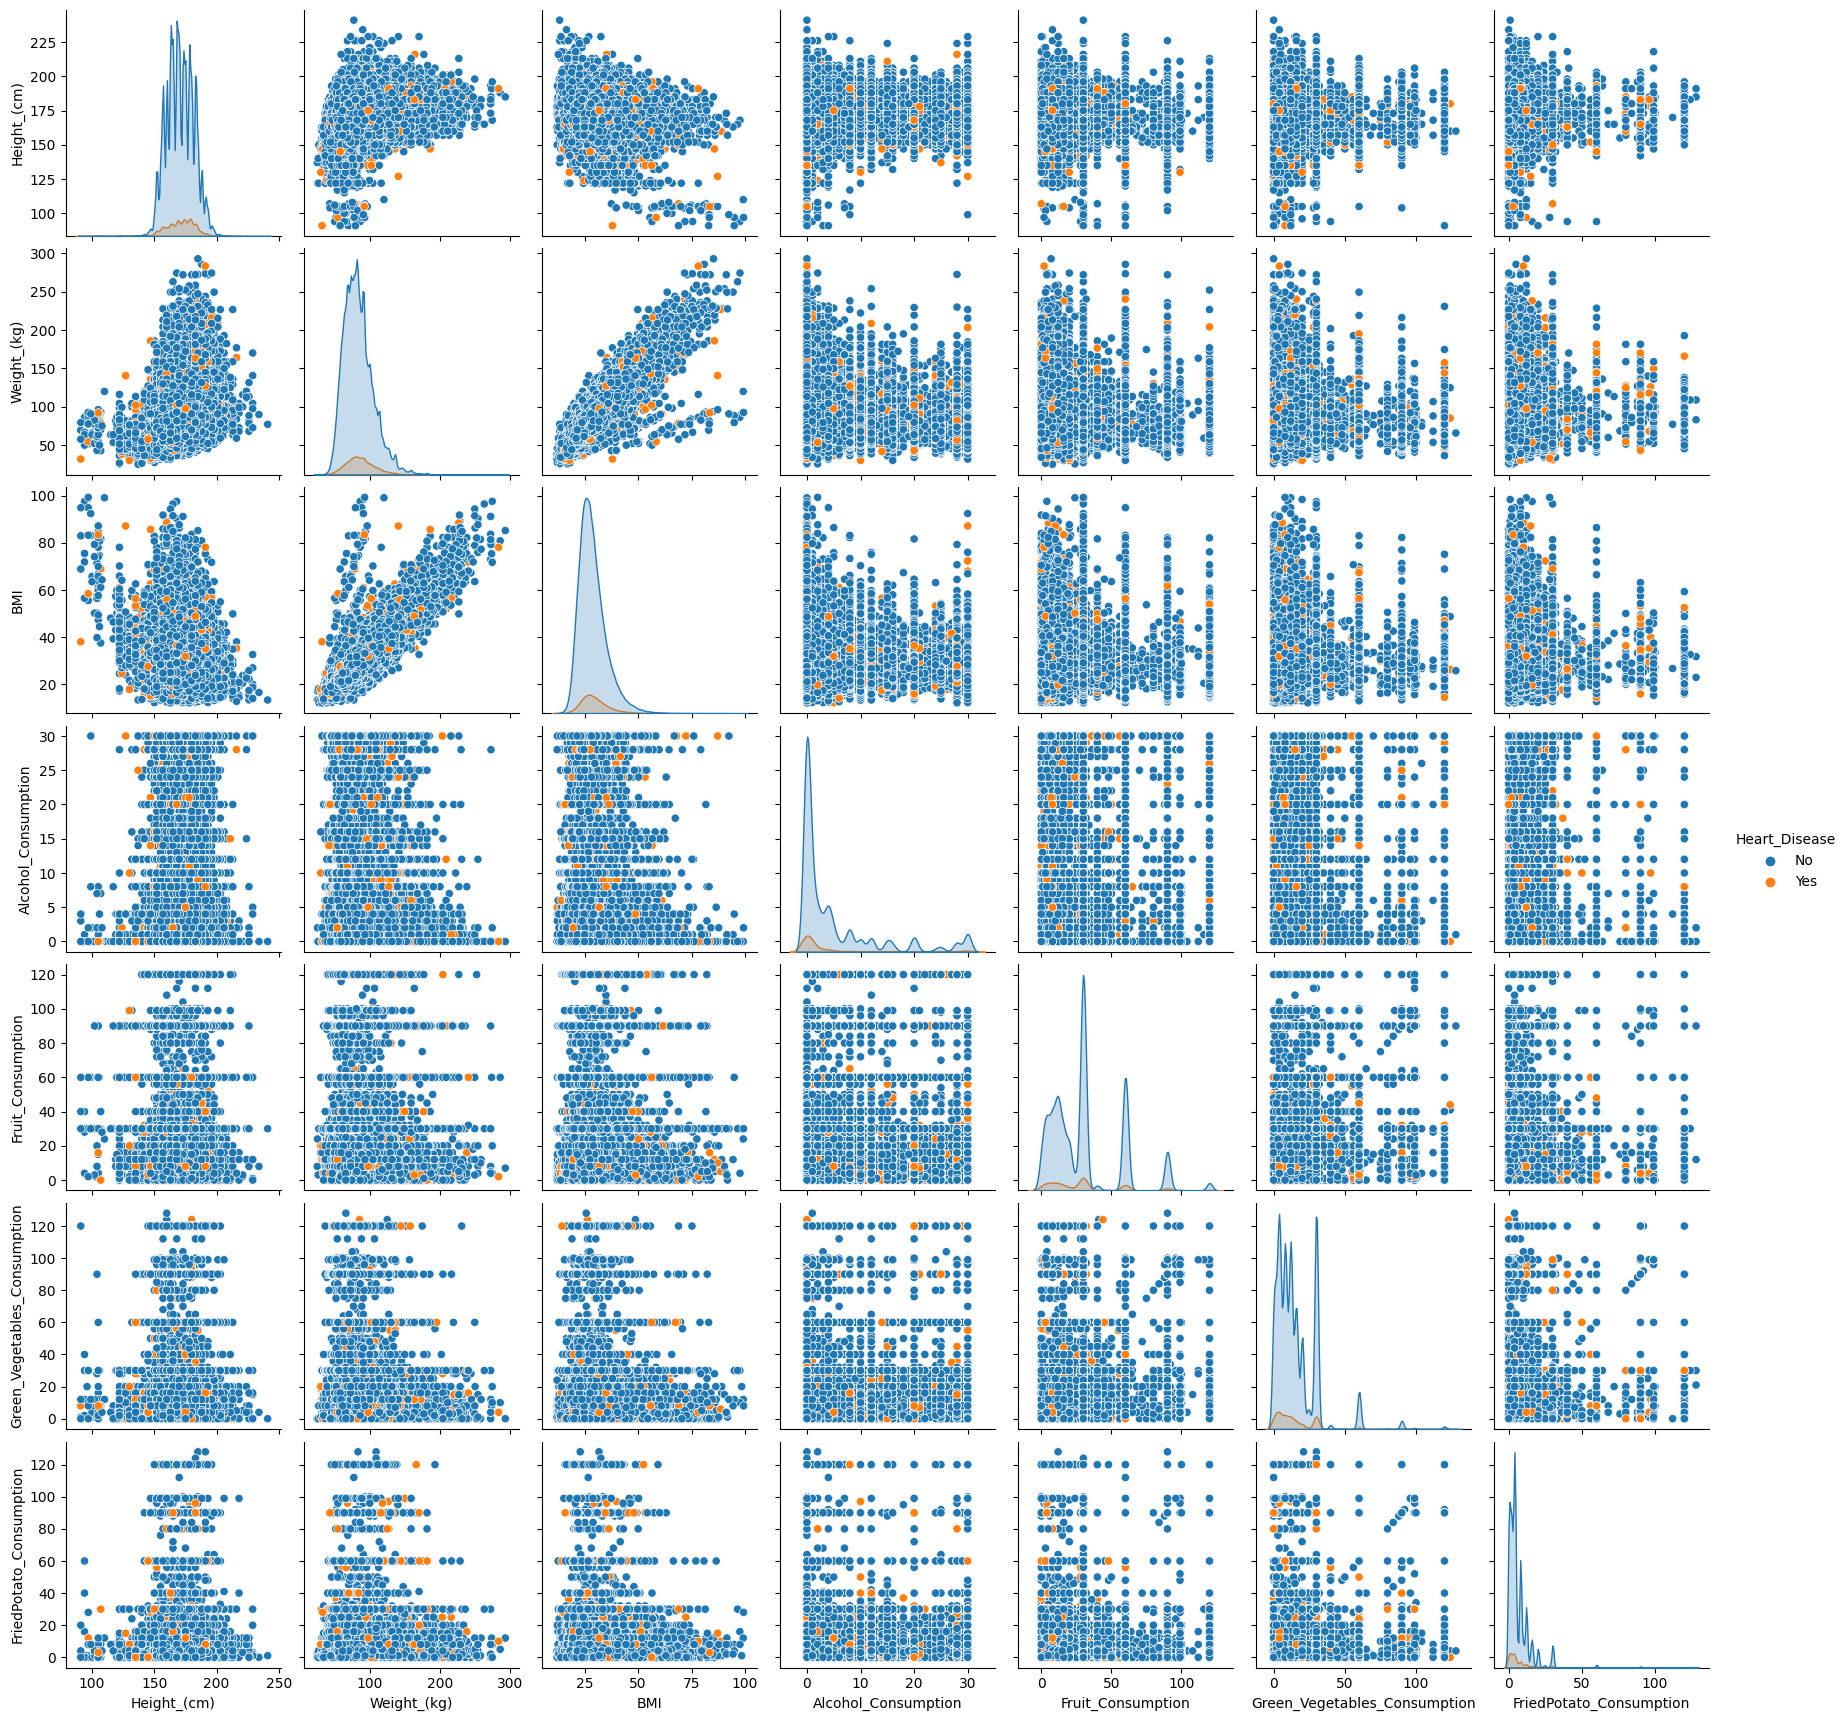

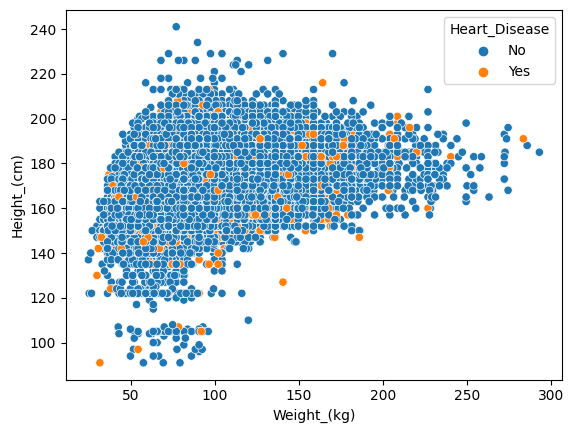

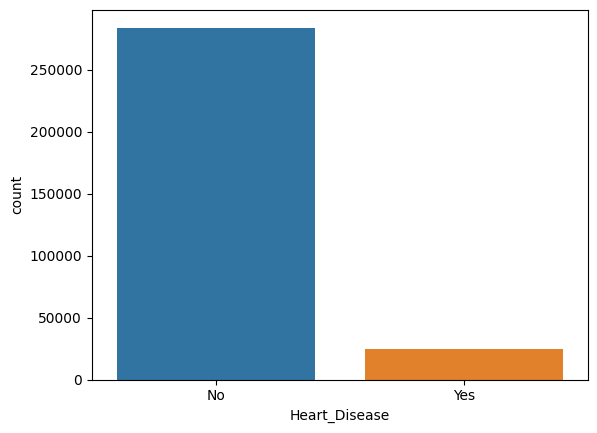

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Check for NaN values
print(df.isnull().sum())

# Pairplot
sns.pairplot(df, hue="Heart_Disease")
plt.show()

# Scatterplot
sns.scatterplot(x="Weight_(kg)", y="Height_(cm)", data=df, hue="Heart_Disease")
plt.show()

# Barchart
sns.countplot(x="Heart_Disease", data=df)
plt.show()


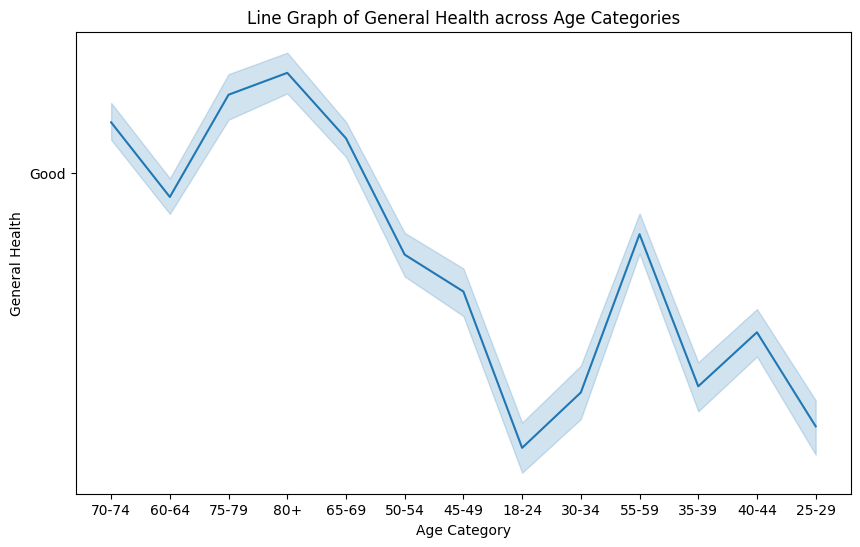

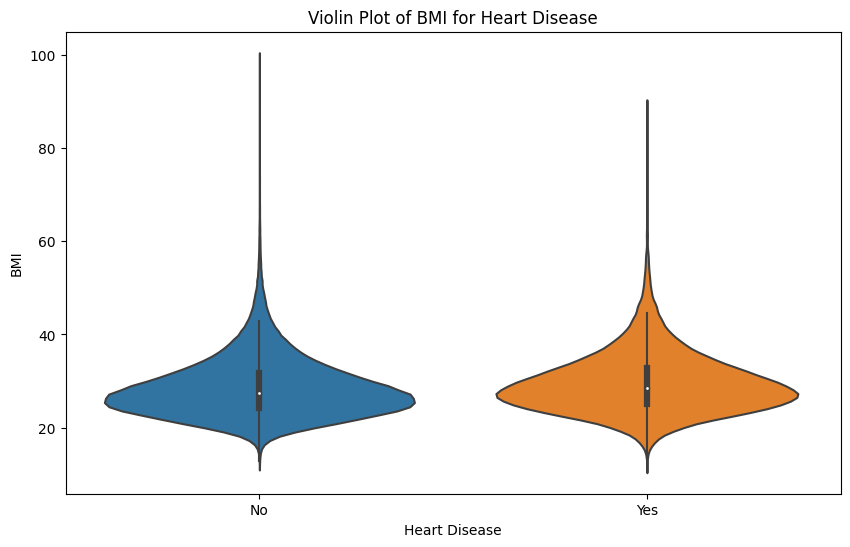

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Line Graph: General Health across Age Categories
plt.figure(figsize=(10, 6))
sns.lineplot(x="Age_Category", y="General_Health", data=df)
plt.xlabel("Age Category")
plt.ylabel("General Health")
plt.title("Line Graph of General Health across Age Categories")
plt.show()

# Violin Plot: BMI for Heart Disease
plt.figure(figsize=(10, 6))
sns.violinplot(x="Heart_Disease", y="BMI", data=df)
plt.xlabel("Heart Disease")
plt.ylabel("BMI")
plt.title("Violin Plot of BMI for Heart Disease")
plt.show()

In [ ]:
# 4.Split dataframe into X, Y, train, test data (Do apply 80:20)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Identify features (X) and target variable (Y)
X = df.drop("General_Health", axis=1)  # Assuming "Heart_Disease" is the target variable
Y = df["General_Health"]

# Split the data into training and testing sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (247083, 18)
X_test shape: (61771, 18)
Y_train shape: (247083,)
Y_test shape: (61771,)


In [ ]:
# 5.Try categorical (Random forest, Decision Tree, Naive Bayes) or numerical (SVC, Logistic Regression) models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Identify features (X) and target variable (Y)
X = df.drop("General_Health", axis=1)  # Assuming "Heart_Disease" is the target variable
Y = df["General_Health"]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Categorical Models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()

# Train Categorical Models
rf_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
nb_model.fit(X_train, Y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Evaluate Models
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_pred))
print("Naive Bayes Accuracy:", accuracy_score(Y_test, nb_pred))

# Print Classification Reports
print("\nRandom Forest Classification Report:\n", classification_report(Y_test, rf_pred))
print("\nDecision Tree Classification Report:\n", classification_report(Y_test, dt_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(Y_test, nb_pred))

# Confusion Matrix for Random Forest (example, you can do it for other models)
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(Y_test, rf_pred))


Random Forest Accuracy: 0.4029237020608376
Decision Tree Accuracy: 0.33156335497239803
Naive Bayes Accuracy: 0.2934548574573829

Random Forest Classification Report:
               precision    recall  f1-score   support

   Excellent       0.40      0.24      0.30     11339
        Fair       0.33      0.18      0.23      7166
        Good       0.38      0.45      0.42     18784
        Poor       0.31      0.09      0.13      2265
   Very Good       0.43      0.55      0.48     22217

    accuracy                           0.40     61771
   macro avg       0.37      0.30      0.31     61771
weighted avg       0.39      0.40      0.39     61771


Decision Tree Classification Report:
               precision    recall  f1-score   support

   Excellent       0.29      0.29      0.29     11339
        Fair       0.22      0.22      0.22      7166
        Good       0.34      0.34      0.34     18784
        Poor       0.16      0.16      0.16      2265
   Very Good       0.40      0.40 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Identify numerical features and target variable
numerical_features = df[['Height_(cm)', 'Weight_(kg)', 'BMI']]

X = numerical_features
Y = df['Heart_Disease']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature Scaling for SVC and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Numerical Models
svm_model = SVC(random_state=42, gamma='auto')  # You can adjust other parameters like C or gamma
lr_model = LogisticRegression(random_state=42)

# Train Numerical Models
svm_model.fit(X_train_scaled, Y_train)
lr_model.fit(X_train_scaled, Y_train)

# Predictions
svm_pred = svm_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate Models
print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))
print("Logistic Regression Accuracy:", accuracy_score(Y_test, lr_pred))

# Print Classification Reports
print("\nSVM Classification Report:\n", classification_report(Y_test, svm_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(Y_test, lr_pred))

# Confusion Matrix for SVM (example, you can do it for Logistic Regression)
print("\nConfusion Matrix (SVM):\n", confusion_matrix(Y_test, svm_pred))

SVM Accuracy: 0.9191044341195707
Logistic Regression Accuracy: 0.9191044341195707


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM Classification Report:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96     56774
         Yes       0.00      0.00      0.00      4997

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96     56774
         Yes       0.00      0.00      0.00      4997

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771


Confusion Matrix (SVM):
 [[56774     0]
 [ 4997     0]]


6.Find out best model for this dataset crassification based on the accuracy obtained on above models.

To determine the best model based on accuracy, you can compare the accuracy scores obtained from each model. The model with the highest accuracy on the test set is considered the best for your specific dataset and task.

In the provided code, you have accuracy scores printed for each model. The model with the highest accuracy is the one you can consider as the best for your dataset.

best model for this dataset is Logistic Regression Accuracy,SVC

Random Forest Accuracy: 0.4029237020608376 Decision Tree Accuracy: 0.33156335497239803 Naive Bayes Accuracy: 0.2934548574573829 SVM Accuracy: 0.9191044341195707 Logistic Regression Accuracy: 0.9191044341195707

In [ ]:
#7. Perform model evaluation, including confusion matrix as heatmap, accuracy, precision, recall, F1 Score reports.

SVM Accuracy: 0.9191044341195707
Logistic Regression Accuracy: 0.9191044341195707


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM Classification Report:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96     56774
         Yes       0.00      0.00      0.00      4997

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96     56774
         Yes       0.00      0.00      0.00      4997

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771



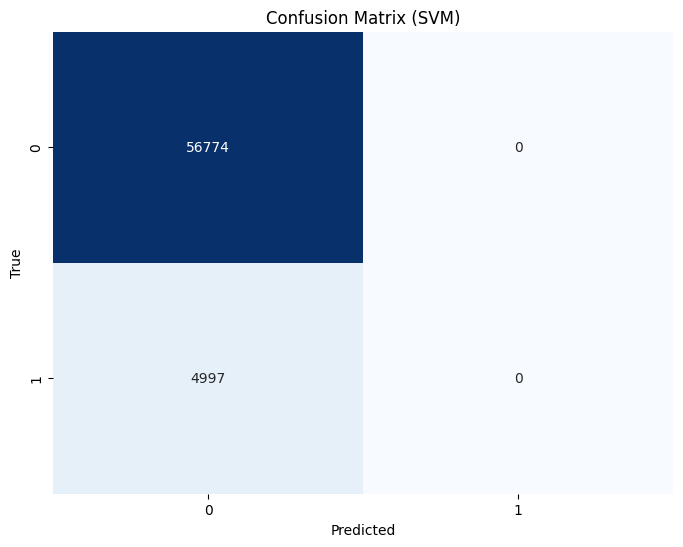

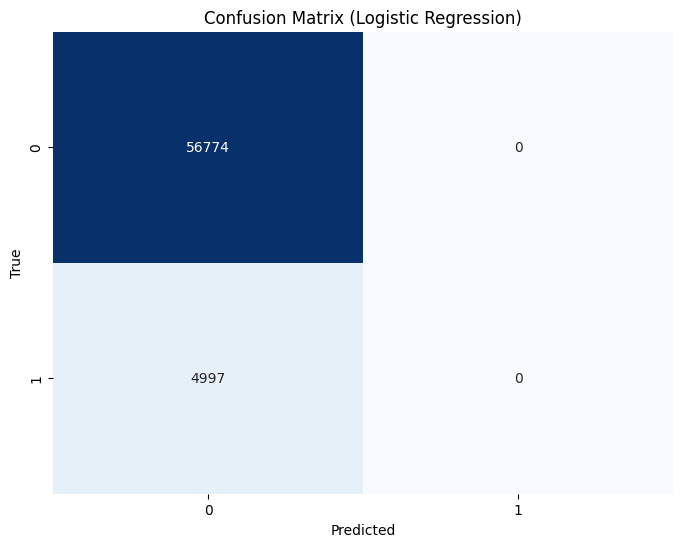

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Identify numerical features and target variable
numerical_features = df[['Height_(cm)', 'Weight_(kg)', 'BMI']]

X = numerical_features
Y = df['Heart_Disease']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature Scaling for SVC and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Numerical Models
svm_model = SVC(random_state=42, gamma='auto')  # You can adjust other parameters like C or gamma
lr_model = LogisticRegression(random_state=42)

# Train Numerical Models
svm_model.fit(X_train_scaled, Y_train)
lr_model.fit(X_train_scaled, Y_train)

# Predictions
svm_pred = svm_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate Models
print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))
print("Logistic Regression Accuracy:", accuracy_score(Y_test, lr_pred))

# Print Classification Reports
print("\nSVM Classification Report:\n", classification_report(Y_test, svm_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(Y_test, lr_pred))

# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, svm_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, lr_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
#8. Make a real time system that accepts only one sample at a time ad produce single prediction.

#(For example, feed a single sample and produce its prediction as outcome Result = model. predict(x_test[0]))


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("CVD_cleaned.csv.zip")

# Identify features (X) and target variable (Y)
X = df.drop("General_Health", axis=1)  # Assuming "Heart_Disease" is the target variable
Y = df["General_Health"]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Feature Scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, Y_train)

# Function for real-time prediction
def predict_single_sample(sample, model, scaler, imputer, columns):
    # Create a DataFrame with named columns
    sample_df = pd.DataFrame([sample], columns=columns)

    # Handle missing values by imputing with the mean (you can choose another strategy)
    sample_imputed = pd.DataFrame(imputer.transform(sample_df), columns=sample_df.columns)

    # Preprocess the sample (one-hot encoding for categorical features)
    sample_encoded = pd.get_dummies(sample_imputed, drop_first=True)

    # Ensure all columns are present in the sample data
    for col in columns:
        if col not in sample_encoded.columns:
            sample_encoded[col] = 0

    # Reorder columns to match the order during training
    sample_encoded = sample_encoded[X_train.columns]

    # Scale the numerical features
    sample_scaled = scaler.transform(sample_encoded)

    # Make a prediction
    prediction = model.predict(sample_scaled.reshape(1, -1))

    return prediction[0]

# Example usage
sample_to_predict = {
    'Height_(cm)': 170,
    'Weight_(kg)': 65,
    'BMI': 22,
    'Exercise': 'Yes',  # Categorical feature
    'Smoking_History': 'No'  # Categorical feature
}

# Ensure that the columns are in the correct order
columns_order = X_train.columns

# Create an imputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)

result = predict_single_sample(sample_to_predict, lr_model, scaler, imputer, columns_order)
print(f"The predicted outcome for the sample is: {result}")


The predicted outcome for the sample is: Very Good
